In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# DATASET EXPLORATION

In [26]:
anime_info = pd.read_csv('anime.csv')
ratings = pd.read_csv('rating.csv')

In [27]:
anime_info.head()

#this data set contains the following:
                #anime_id : myanimelist.net's unique id identifying an anime.
                #name : full name of anime.
                #genre : comma separated list of genres for this anime.
                #type : movie, TV, OVA, etc.
                #episodes : how many episodes in this show. (1 if movie).
                #rating : average rating out of 10 for this anime.
                #members : number of community members that are in this anime's "group".


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [28]:
print(f"Shape of the anime dataset: {anime_info.shape}")

Shape of the anime dataset: (12294, 7)


In [29]:
print(f"Informations About Anime Dataset :\n")
print(anime_info.info())

#this contains information such as variable types, memory usage, etc.

Informations About Anime Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


In [30]:
ratings.head()

#this dataset contains the following:
#                   user_id : non identifiable randomly generated user id.
#                   anime_id : the anime that this user has rated.
#                   rating : rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [31]:
print(f"Shape of the ratings dataset: {ratings.shape}")
#the ratings dataset contains 7813737 rows and 3 columns

Shape of the ratings dataset: (7813737, 3)


In [32]:
print(f"Informations About Ratings Dataset :\n")
print(ratings.info())

Informations About Ratings Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


# CLEANING THE ANIME_INFO DATASET 

In [33]:
print("Summary of The Anime Dataset :")
anime_info.describe().T.style.set_properties(**{"color":"blue","border": "1.5px  solid black"})

Summary of The Anime Dataset :


,count,mean,std,min,25%,50%,75%,max
anime_id,12294.000000,14058.221653,11455.294701,1.000000,3484.250000,10260.500000,24794.500000,34527.000000
rating,12064.000000,6.473902,1.026746,1.670000,5.880000,6.570000,7.180000,10.000000
members,12294.000000,18071.338864,54820.676925,5.000000,225.000000,1550.000000,9437.000000,1013917.000000


In [34]:
anime_info.describe(include=object).T.style.set_properties(**{"color":"blue","border": "1.2px  solid black"})

,count,unique,top,freq
name,12294,12292,Shi Wan Ge Leng Xiaohua,2
genre,12232,3264,Hentai,823
type,12269,6,TV,3787
episodes,12294,187,1,5677


In [35]:
print("Null Values of Anime Dataset :")
anime_info.isna().sum().to_frame().T.style.set_properties(**{"color":"blue","border": "1.5px  solid black"})

Null Values of Anime Dataset :


,anime_id,name,genre,type,episodes,rating,members
0,0,0,62,25,0,230,0


In [36]:
anime_info.dropna(axis = 0, inplace = True)
anime_info.isna().sum().to_frame().T.style.set_properties(**{"color":"blue","border": "1.5px  solid black"})

,anime_id,name,genre,type,episodes,rating,members
0,0,0,0,0,0,0,0


In [37]:
dup_anime = anime_info[anime_info.duplicated()].shape[0]
print(f"There are {dup_anime} duplicate entries among {anime_info.shape[0]} entries in anime dataset.")

There are 0 duplicate entries among 12017 entries in anime dataset.


# CLEANING THE RATINGS DATASET

In [38]:
print("Summary of The Ratings Dataset :")
ratings.describe().T.style.set_properties(**{"color":"blue","border": "1.5px  solid black"})

Summary of The Ratings Dataset :


,count,mean,std,min,25%,50%,75%,max
user_id,7813737.000000,36727.956745,20997.946119,1.000000,18974.000000,36791.000000,54757.000000,73516.000000
anime_id,7813737.000000,8909.072104,8883.949636,1.000000,1240.000000,6213.000000,14093.000000,34519.000000
rating,7813737.000000,6.144030,3.727800,-1.000000,6.000000,7.000000,9.000000,10.000000


In [39]:
print("Null Values of Ratings Dataset :")
ratings.isna().sum().to_frame().T.style.set_properties(**{"color":"blue","border": "1.5px  solid black"})

Null Values of Ratings Dataset :


,user_id,anime_id,rating
0,0,0,0


In [40]:
dup_rating = ratings[ratings.duplicated()].shape[0]
print(f"There are {dup_rating} duplicate entries among {ratings.shape[0]} entries in rating dataset.")

ratings.drop_duplicates(keep='first',inplace=True)
print(f"\nAfter removing duplicate entries there are {ratings.shape[0]} entries in this dataset.")

There are 1 duplicate entries among 7813737 entries in rating dataset.

After removing duplicate entries there are 7813736 entries in this dataset.


# Merging the two datasets ie anime_info and ratings

In [41]:
merge_anime_data = pd.merge(anime_info,ratings,on="anime_id",suffixes= [None, "_user"])
merge_anime_data = merge_anime_data.rename(columns={"rating_user": "user_rating"})

print(f"New Shape: {merge_anime_data.shape}")
print("\nFirst Five Rows of The Merged Dataset :")

merge_anime_data.head().style.set_properties(**{"color":"black","border": "1.5px  solid black"})

New Shape: (7813610, 9)

First Five Rows of The Merged Dataset :


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,278,-1


# Data Visualization

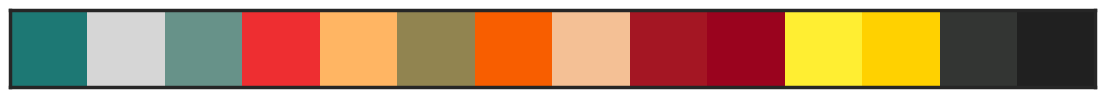

In [42]:
sns.set_style("white")
sns.set_context("poster",font_scale = .7)

palette = ["#1d7874","#d6d6d6","#679289","#ee2e31","#ffb563","#918450","#f85e00","#f4c095","#a41623","#9a031e","#ffee32","#ffd100","#333533","#202020"]

sns.palplot(sns.color_palette(palette))
plt.show()

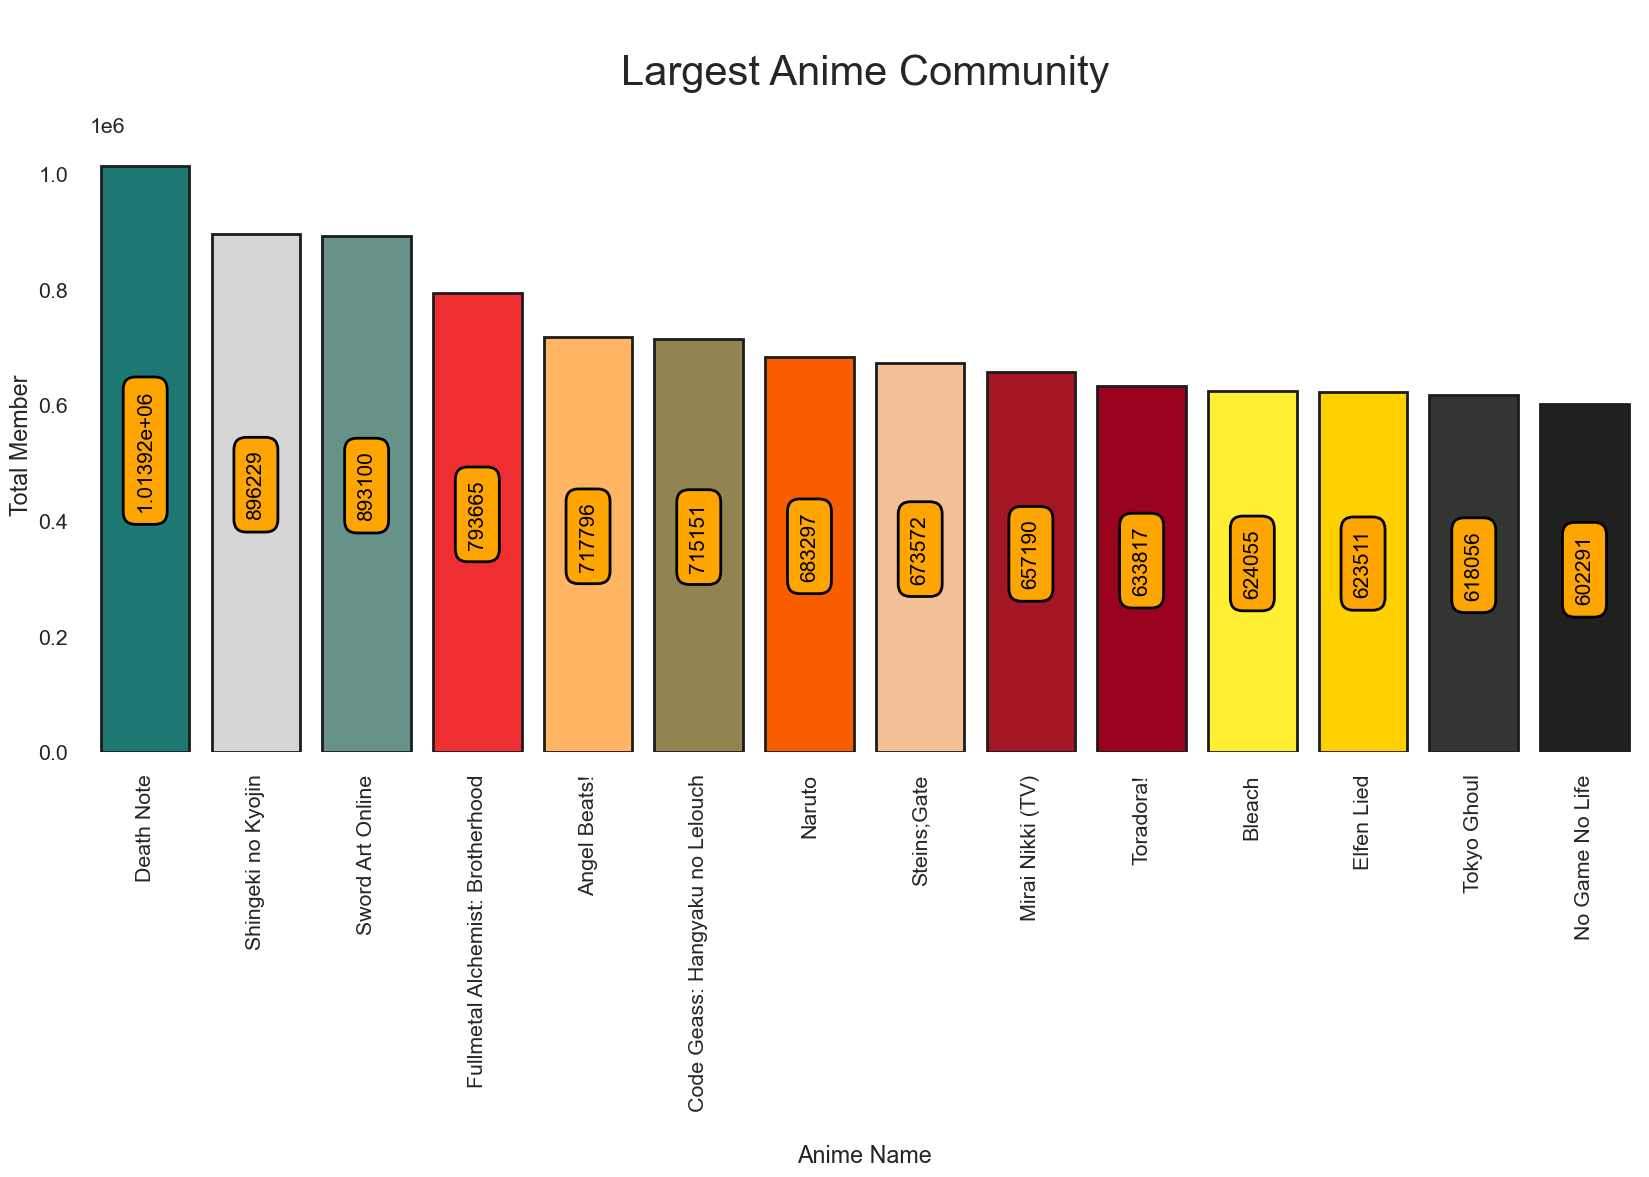

In [43]:
topanime_community = merge_anime_data.copy()
topanime_community.drop_duplicates(subset ="name", keep = "first", inplace = True)
topanime_community_temp1 = topanime_community.sort_values(["members"],ascending=False)

plt.subplots(figsize=(20,8))
p = sns.barplot(x=topanime_community_temp1["name"][:14],y=topanime_community_temp1["members"],
                palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nLargest Anime Community\n", fontsize=30)
plt.ylabel("Total Member")
plt.xlabel("\nAnime Name")



plt.xticks(rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 6,size = 15,color = "black",rotation = 90,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

# GENRES

In [44]:
topanime_community_temp3 = topanime_community[["genre"]]
topanime_community_temp3["genre"] = topanime_community_temp3["genre"].str.split(", | , | ,")
topanime_community_temp3 = topanime_community_temp3.explode("genre")
topanime_community_temp3["genre"] = topanime_community_temp3["genre"].str.title()

print(f'Total unique genres are {len(topanime_community_temp3["genre"].unique())}')
print(f'Occurances of unique genres :')
topanime_community_temp3["genre"].value_counts().to_frame().T.style.set_properties(**{"color":"black","border": "1.5px  solid black"})

Total unique genres are 43
Occurances of unique genres :


,Comedy,Action,Adventure,Fantasy,Sci-Fi,Drama,Shounen,Romance,Kids,School,Slice Of Life,Hentai,Supernatural,Mecha,Music,Historical,Magic,Ecchi,Shoujo,Seinen,Sports,Mystery,Super Power,Military,Parody,Space,Horror,Harem,Demons,Martial Arts,Psychological,Dementia,Police,Game,Samurai,Vampire,Thriller,Cars,Shounen Ai,Shoujo Ai,Josei,Yuri,Yaoi
genre,4271,2686,2197,2107,1981,1857,1636,1420,1306,1135,1115,1095,964,910,763,719,712,619,576,513,508,472,433,410,379,362,348,306,279,246,221,200,183,161,142,97,84,65,61,54,52,41,37


# CATEGORIES

In [45]:
print("Anime Categories :")
topanime_community_temp1["type"].value_counts().to_frame().T.style.set_properties(**{"color":"black","border": "1.5px  solid black"})

Anime Categories :


,TV,OVA,Movie,Special,ONA,Music
type,3402,3090,2111,1581,526,451


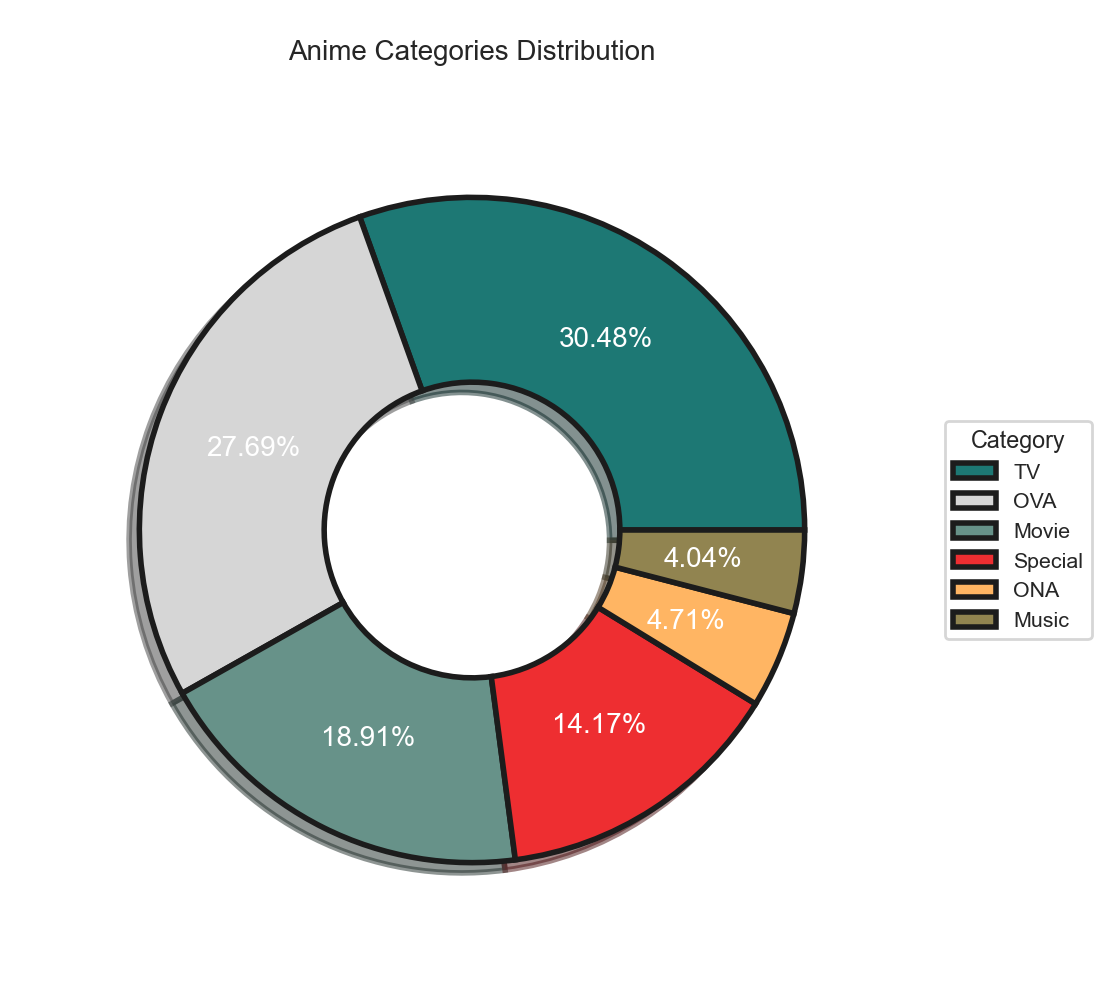

In [47]:
plt.subplots(figsize=(12, 12))

labels = "TV","OVA","Movie","Special","ONA","Music"
size = 0.5

wedges, texts, autotexts = plt.pie([len(topanime_community_temp1[topanime_community_temp1["type"]=="TV"]["type"]),
                                    len(topanime_community_temp1[topanime_community_temp1["type"]=="OVA"]["type"]),
                                    len(topanime_community_temp1[topanime_community_temp1["type"]=="Movie"]["type"]),
                                    len(topanime_community_temp1[topanime_community_temp1["type"]=="Special"]["type"]),
                                    len(topanime_community_temp1[topanime_community_temp1["type"]=="ONA"]["type"]),
                                    len(topanime_community_temp1[topanime_community_temp1["type"]=="Music"]["type"])],
                                    explode = (0,0,0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.7,
                                    radius=.9, 
                                    colors = palette, 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "#1c1c1c", 
                                    linewidth = 4),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nAnime Categories Distribution",fontsize=20)
plt.show()


#3402 animes are aired on TV which is 30.48% of total animes
#2111 animes are streamed as Movie which is 18.91% of total animes
#3090 animes are streamed as OVA which is 27.69% of total animes also greater than ONA which includes 526 animes that is 4.71% of total animes.

In [48]:
data = merge_anime_data.copy()
data["user_rating"].replace(to_replace = -1 , value = np.nan ,inplace=True)
data = data.dropna(axis = 0)
print("Null values after final pre-processing :")
data.isna().sum().to_frame().T.style.set_properties()

Null values after final pre-processing :


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,0,0,0,0,0,0,0,0,0


# CLEANIG THE merge_anime_data DATASET

First, it creates a copy of the original dataset and stores it in a variable called data. This is to avoid modifying the original dataset in case we need to refer back to it later.

Next, it replaces all the values of -1 in the "user_rating" column with NaN values. NaN stands for "not a number" and is a way of representing missing or undefined data in pandas.

After that, it drops any rows in the dataset that contain NaN values. This is because missing data can cause problems when analyzing or modeling the data, and it's often better to remove those rows instead of trying to fill in the missing values.

Finally, it prints out the number of null values (i.e., missing values) in the resulting dataset to make sure that there are no more missing values after the cleaning process.

In [49]:
selected_users = data["user_id"].value_counts()
data = data[data["user_id"].isin(selected_users[selected_users >= 50].index)]


# this line of code is used to filter the data DataFrame by selecting only the 
# users who have rated at least 50 anime. This is a common preprocessing step when 
# building a recommendation system, as it helps to focus on the users who have provided 
# enough data to make reliable recommendations.

In [50]:
cosine_stuff = pd.pivot_table(data, values='user_rating', index=['name'], columns=['user_id'], fill_value=0)
cosine_stuff.head()

user_id,3,5,7,11,14,17,21,23,24,27,...,73495,73499,73500,73501,73502,73503,73504,73507,73510,73515
name,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,10,0,0,0,0,0
&quot;Bungaku Shoujo&quot; Memoire,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,0
&quot;Bungaku Shoujo&quot; Movie,0,0,0,0,8,0,0,0,0,0,...,0,0,0,0,10,0,0,0,0,0
&quot;Eiji&quot;,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
# Define the TfidfVectorizer with desired parameters
tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents="unicode", analyzer="word",
                      token_pattern=r"\w{1,}", ngram_range=(1, 3), stop_words = "english")

# Create a copy of the data and remove duplicate anime names
rec_data = merge_anime_data.copy()
rec_data.drop_duplicates(subset="name", keep="first", inplace=True)
rec_data.reset_index(drop=True, inplace=True)

# Split the genre strings and convert them to a string datatype
genres = rec_data["genre"].str.split(", | , | ,").astype(str)

# Use the TfidfVectorizer to create a matrix of genre feature vectors
tfv_matrix = tfv.fit_transform(genres)


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel

# Vectorize the genres column
tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents="unicode", analyzer="word",
                      token_pattern=r"\w{1,}", ngram_range=(1, 3), stop_words="english")
tfv_matrix = tfv.fit_transform(rec_data["genre"].astype(str))

# Compute sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

# Create a mapping of anime titles to their corresponding index in the rec_data DataFrame
rec_indices = pd.Series(rec_data.index, index=rec_data["name"]).drop_duplicates()

# Define recommendation function
def give_recommendation(title, sig=sig, rec_indices=rec_indices, anime_info=rec_data):
    
    # Get the index of the given anime title
    idx = rec_indices[title]
    
    # Compute pairwise sigmoid kernel similarity scores between the given anime and all other anime
    sig_score = list(enumerate(sig[idx]))
    
    # Sort the similarity scores in descending order and select the top 10 similar anime
    sig_score = sorted(sig_score, key=lambda x: x[1], reverse=True)
    sig_score = sig_score[1:11]
    anime_indices = [i[0] for i in sig_score]
     
    # Create a DataFrame of the top 10 similar anime
    rec_dic = {"No": range(1, 11), 
               "Anime Name": anime_info["name"].iloc[anime_indices].values,
               "Rating": anime_info["rating"].iloc[anime_indices].values}
    dataframe = pd.DataFrame(data=rec_dic)
    dataframe.set_index("No", inplace=True) 
    #data frame created
    
    # Print the recommendations for the given anime title
    print(f"Recommendations for {title} viewers:\n")
    return dataframe.style.set_properties(**{"color":"black","border": "1.5px solid black"})


this creates a function that uses sigmoid kernel to find similar anime. 
A sigmoid kernel is a mathematical formula used to measure the similarity between two sets of data.

The code first computes the sigmoid kernel for a matrix created using the anime genre information. 
It then defines a recommendation function that takes an anime title as input and returns 
the top 10 anime with the highest similarity score to the input anime based on the sigmoid kernel.

In [54]:
give_recommendation("Gintama")

Recommendations for Gintama viewers:



,Anime Name,Rating
No,,
1,Gintama',9.160000
2,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,9.100000
3,Gintama': Enchousen,9.110000
4,Gintama,9.040000
5,Gintama: Yorinuki Gintama-san on Theater 2D,8.600000
6,Gintama Movie: Shinyaku Benizakura-hen,8.590000
7,Gintama: Shinyaku Benizakura-hen,8.310000
8,Gintama: Jump Festa 2014 Special,8.200000
9,Gintama: Jump Festa 2015 Special,8.150000


In [55]:
give_recommendation("Death Note")

Recommendations for Death Note viewers:



,Anime Name,Rating
No,,
1,Death Note Rewrite,7.840000
2,Mousou Dairinin,7.740000
3,Higurashi no Naku Koro ni Kai,8.410000
4,Higurashi no Naku Koro ni Rei,7.560000
5,Bloody Night,4.260000
6,Higurashi no Naku Koro ni,8.170000
7,Shigofumi,7.620000
8,Himitsu: The Revelation,7.420000
9,Monster,8.720000


In [56]:
give_recommendation("Naruto")

Recommendations for Naruto viewers:



,Anime Name,Rating
No,,
1,Naruto,7.810000
2,Boruto: Naruto the Movie - Naruto ga Hokage ni Natta Hi,7.680000
3,Naruto x UT,7.580000
4,Naruto: Shippuuden Movie 4 - The Lost Tower,7.530000
5,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsugu Mono,7.500000
6,Naruto Shippuuden: Sunny Side Battle,7.260000
7,Naruto Soyokazeden Movie: Naruto to Mashin to Mitsu no Onegai Dattebayo!!,7.110000
8,Battle Spirits: Ryuuko no Ken,4.890000
9,Kyutai Panic Adventure!,5.210000


In [57]:
give_recommendation("Monster")

Recommendations for Monster viewers:



,Anime Name,Rating
No,,
1,Dwaejiui Wang,7.030000
2,Gyakkyou Burai Kaiji: Ultimate Survivor,8.330000
3,Gyakkyou Burai Kaiji: Hakairoku-hen,8.290000
4,Touhai Densetsu Akagi: Yami ni Maiorita Tensai,8.020000
5,Aoi Bungaku Series,7.900000
6,Mayoiga,5.800000
7,Death Note,8.710000
8,Death Note Rewrite,7.840000
9,Monster Extra,6.810000


In [58]:
give_recommendation("Hunter x Hunter")

Recommendations for Hunter x Hunter viewers:



,Anime Name,Rating
No,,
1,Hunter x Hunter,8.480000
2,Hunter x Hunter OVA,8.410000
3,Hunter x Hunter: Greed Island Final,8.410000
4,Hunter x Hunter: Greed Island,8.330000
5,Hunter x Hunter Movie: Phantom Rouge,7.390000
6,Hunter x Hunter Pilot,7.370000
7,Hunter x Hunter Movie: The Last Mission,7.350000
8,Nano Invaders,7.080000
9,Taegeugsonyeon Huin Dogsuli,3.790000


In [59]:
give_recommendation("One Piece Film: Strong World")

Recommendations for One Piece Film: Strong World viewers:



,Anime Name,Rating
No,,
1,One Piece Film: Z,8.390000
2,One Piece Film: Gold,8.320000
3,One Piece: Heart of Gold,7.750000
4,Digimon Frontier,7.250000
5,Digimon Tamers,7.650000
6,Digimon Savers,7.100000
7,Digimon Frontier: Ornismon Fukkatsu!!,7.020000
8,One Piece: Episode of Merry - Mou Hitori no Nakama no Monogatari,8.290000
9,One Piece: Episode of Nami - Koukaishi no Namida to Nakama no Kizuna,8.270000


In [60]:
give_recommendation("Cowboy Bebop")

Recommendations for Cowboy Bebop viewers:



,Anime Name,Rating
No,,
1,Cowboy Bebop: Yose Atsume Blues,7.530000
2,Kaitei Choutokkyuu: Marine Express,6.370000
3,Keroro Gunsou Movie 2: Shinkai no Princess de Arimasu!,7.480000
4,Generator Gawl,7.130000
5,Mama wa Shougaku 4 Nensei,7.310000
6,DNA² OVA,6.730000
7,R.O.D the TV,7.640000
8,Lost Universe,7.100000
9,Ginga Tetsudou Monogatari: Wasurerareta Toki no Wakusei,7.010000
